Importaciones

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

Leer los datos

In [69]:
# Función para leer datos desde un archivo txt con formato "x y"
def ReadData(filename):
    x_data, y_data = [], []
    with open(filename, "r") as file:
        for line in file:
            x_val, y_val = map(float, line.split())  # Separa valores por espacios
            x_data.append(x_val)
            y_data.append(y_val)
    return np.array(x_data), np.array(y_data)

# Leer datos desde el archivo
x, y = ReadData("Datos_Grupo_3.txt")  # Archivo con valores de x e y en columnas

Apartado a

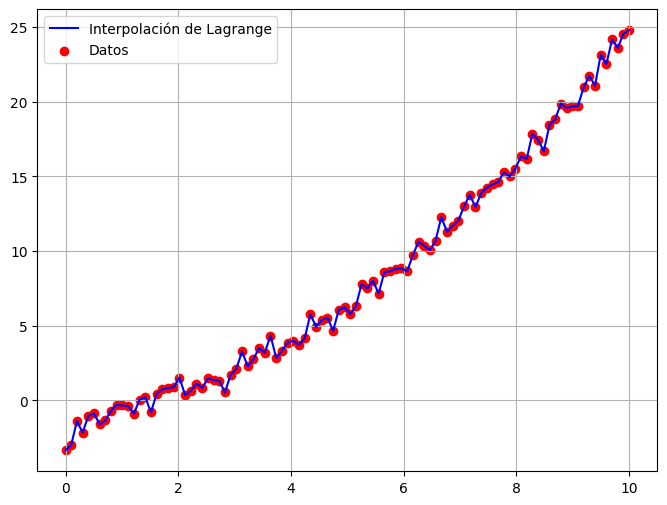

In [70]:
def lagrange_interpolation(x_data, y_data, x_interp):
    def basis(j, x_point):
        term = [(x_point - x_data[m]) / (x_data[j] - x_data[m]) for m in range(len(x_data)) if m != j]
        return np.prod(term, axis=0)
    return sum(y_data[j] * basis(j, x_interp) for j in range(len(x_data)))

x_interp = np.linspace(min(x), max(x), 100)
y_interp = lagrange_interpolation(x, y, x_interp)

plt.figure(figsize=(8, 6))
plt.plot(x_interp, y_interp, label='Interpolación de Lagrange', color='blue')
plt.scatter(x, y, color='red', label='Datos')
plt.legend()
plt.grid()
plt.show()

Apartado b

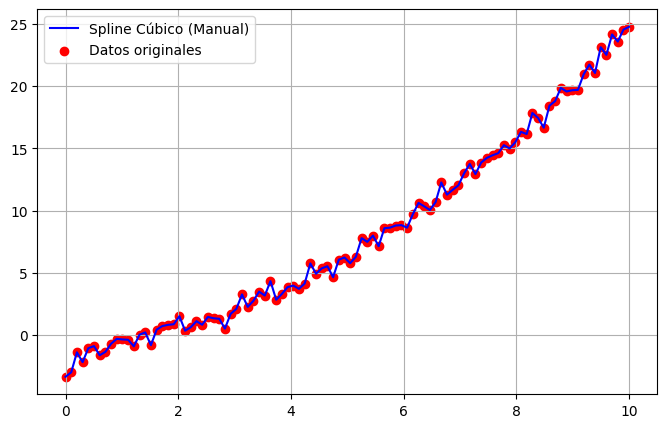

In [71]:
def cubic_spline_manual(x_data, y_data, x_interp):
    n = len(x_data) - 1
    h = np.diff(x_data)  # Diferencias entre puntos
    b = np.diff(y_data) / h  # Pendientes entre puntos

    # Construcción del sistema tridiagonal
    A = np.zeros((n+1, n+1))
    B = np.zeros(n+1)

    A[0, 0] = 1
    A[n, n] = 1
    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        B[i] = 3 * (b[i] - b[i-1])

    # Resolver el sistema para obtener c
    c = np.linalg.solve(A, B)

    # Calcular coeficientes a, b, d
    a = y_data[:-1]
    d = np.diff(c) / (3 * h)
    b = b - h * (2*c[:-1] + c[1:]) / 3

    # Evaluación del spline en los puntos de interpolación
    y_interp = np.zeros_like(x_interp)
    for i in range(n):
        idx = (x_interp >= x_data[i]) & (x_interp <= x_data[i+1])
        dx = x_interp[idx] - x_data[i]
        y_interp[idx] = a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3

    return y_interp

x_interp = np.linspace(min(x), max(x), 100)

#  Interpolación cúbica manual
y_spline = cubic_spline_manual(x, y, x_interp)

#  Graficar los resultados
plt.figure(figsize=(8, 5))
plt.plot(x_interp, y_spline, label='Spline Cúbico (Manual)', color='blue')
plt.scatter(x, y, color='red', label='Datos originales')
plt.legend()
plt.grid()
plt.show()


Apartado c

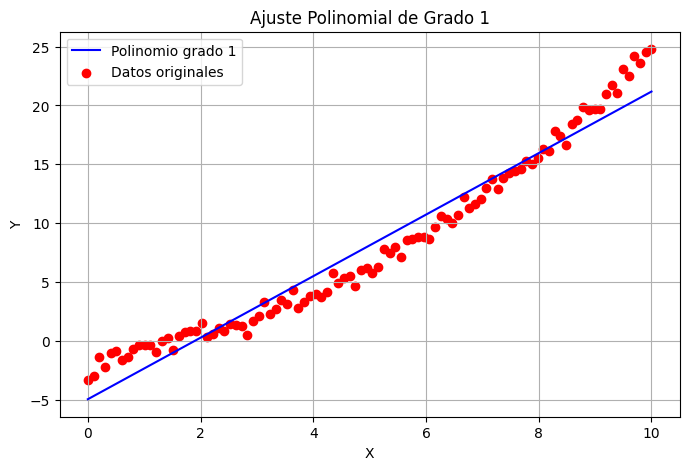

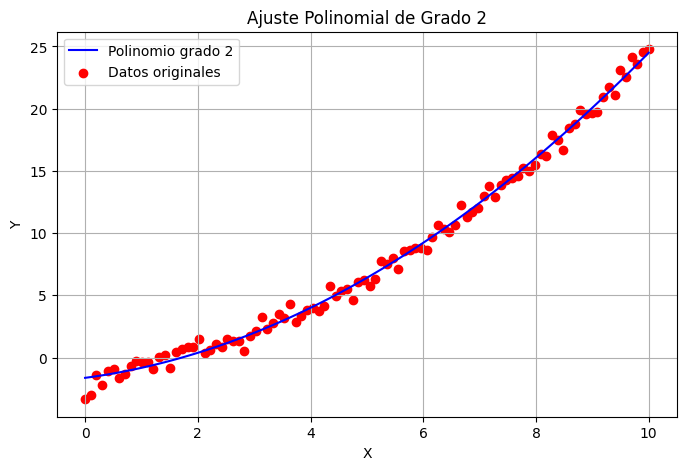

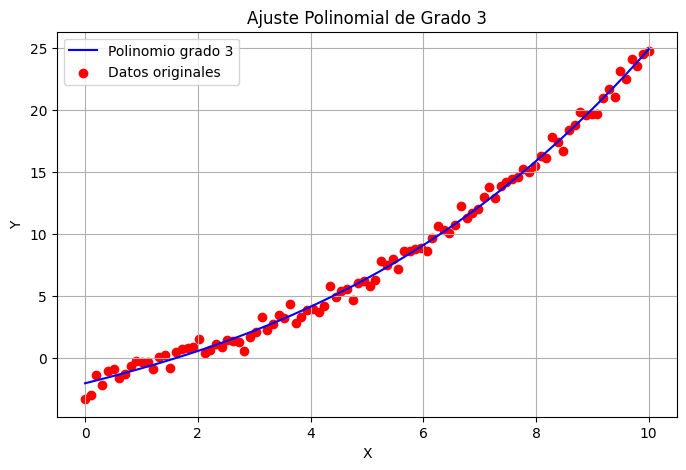

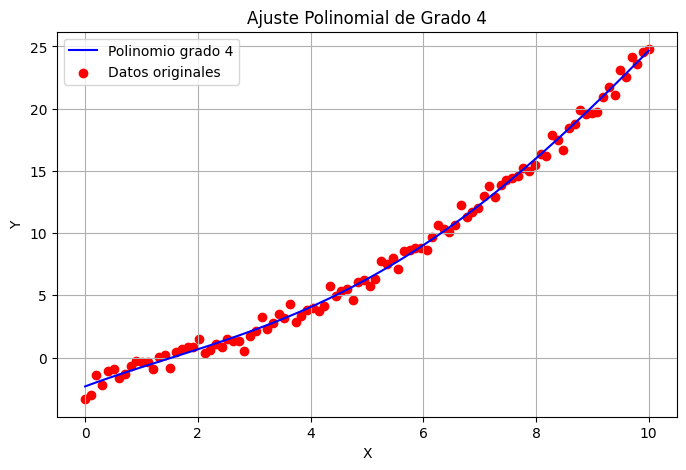

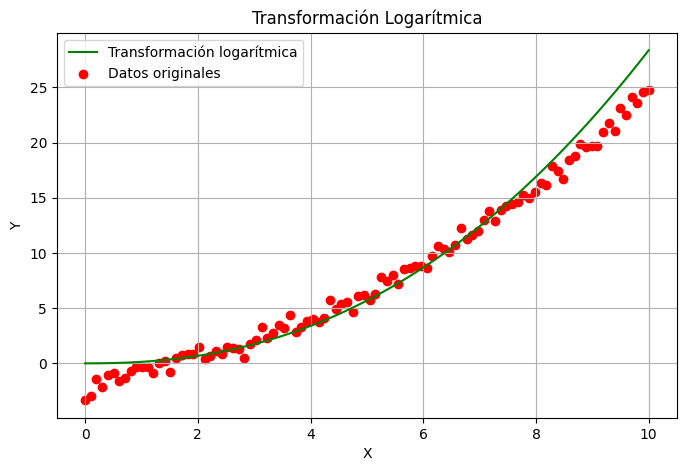

In [72]:
x_interp = np.linspace(min(x), max(x), 100)

# 📌 Ajuste polinomial de grado 1 a 4 (una gráfica por grado)
for degree in range(1, 5):
    coeffs = np.polyfit(x, y, degree)
    poly_func = np.poly1d(coeffs)
    y_fit = poly_func(x_interp)

    plt.figure(figsize=(8, 5))  # Nueva figura en cada iteración
    plt.plot(x_interp, y_fit, label=f'Polinomio grado {degree}', color='blue')
    plt.scatter(x, y, color='red', label='Datos originales')
    plt.legend()
    plt.grid()
    plt.title(f'Ajuste Polinomial de Grado {degree}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# --------------------------
# TRANSFORMACIÓN LOGARÍTMICA
# --------------------------

# Filtrar valores positivos
mask = (x > 0) & (y > 0)  # Evita logaritmos de números no válidos
x_log = np.log(x[mask])
y_log = np.log(y[mask])

# Verificar que la transformación no generó NaN o Inf
if np.any(np.isnan(x_log)) or np.any(np.isnan(y_log)):
    raise ValueError("Se encontraron valores NaN después de la transformación logarítmica.")

# Ajuste lineal en escala log-log
coeffs_log = np.polyfit(x_log, y_log, 1)
y_transformed = np.exp(coeffs_log[1]) * x_interp ** coeffs_log[0]

plt.figure(figsize=(8, 5))  # Nueva figura para la transformación logarítmica
plt.plot(x_interp, y_transformed, label='Transformación logarítmica', color='green')
plt.scatter(x, y, color='red', label='Datos originales')
plt.legend()
plt.grid()
plt.title('Transformación Logarítmica')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Apartado d

Modelo 1: a0 = 12.8980, a1 = 0.0000, a2 = -38.4759
Modelo 2: a0 = 1.9456, a1 = 0.0000, a2 = -11.1571
Modelo 3: a0 = 0.2492, a1 = 2.8941, a2 = 1.3023


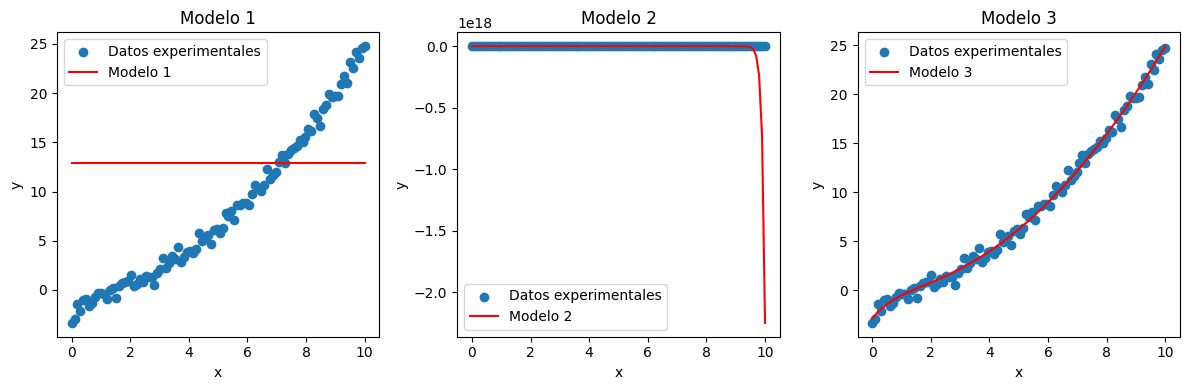

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def funcion_modelo(x, a0, a1, a2, modelo):
    if modelo == 1:
        return a0 - a1 * np.exp(-a2 * x)
    elif modelo == 2:
        return a0 * x - a1 * np.exp(-a2 * x)
    elif modelo == 3:
        return a0 * x**2 - a1 * np.exp(-a2 * x)

def jacobiano(x, a0, a1, a2, modelo):
    J = np.zeros((len(x), 3))
    if modelo == 1:
        J[:, 0] = 1  # Derivada respecto a a0
        J[:, 1] = -np.exp(-a2 * x)  # Derivada respecto a a1
        J[:, 2] = a1 * x * np.exp(-a2 * x)  # Derivada respecto a a2
    elif modelo == 2:
        J[:, 0] = x  # Derivada respecto a a0
        J[:, 1] = -np.exp(-a2 * x)  # Derivada respecto a a1
        J[:, 2] = a1 * x * np.exp(-a2 * x)  # Derivada respecto a a2
    elif modelo == 3:
        J[:, 0] = x**2  # Derivada respecto a a0
        J[:, 1] = -np.exp(-a2 * x)  # Derivada respecto a a1
        J[:, 2] = a1 * x * np.exp(-a2 * x)  # Derivada respecto a a2
    return J

def ajuste_regresion_no_lineal(x, y, modelo, a0_init=1, a1_init=1, a2_init=1, error_tol=0.01, max_iter=100):
    a0, a1, a2 = a0_init, a1_init, a2_init
    for _ in range(max_iter):
        y_pred = funcion_modelo(x, a0, a1, a2, modelo)
        error = y - y_pred
        J = jacobiano(x, a0, a1, a2, modelo)
        delta_a, _, _, _ = np.linalg.lstsq(J, error, rcond=None)
        a0 += delta_a[0]
        a1 += delta_a[1]
        a2 += delta_a[2]
        if np.linalg.norm(delta_a) < error_tol:
            break
    return a0, a1, a2


# Ajuste y graficación de los tres modelos
modelos = [1, 2, 3]
plt.figure(figsize=(12, 4))


for i, modelo in enumerate(modelos, 1):
    a0, a1, a2 = ajuste_regresion_no_lineal(x, y, modelo)
    print(f'Modelo {modelo}: a0 = {a0:.4f}, a1 = {a1:.4f}, a2 = {a2:.4f}')
    
    plt.figure()
    plt.scatter(x, y, label='Datos experimentales')
    x_smooth = np.linspace(min(x), max(x), 100)
    plt.plot(x_smooth, funcion_modelo(x_smooth, a0, a1, a2, modelo), 'r-', label=f'Modelo {modelo}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'Modelo {modelo}')

plt.tight_layout()
plt.show()
